In [46]:
import matplotlib.pyplot as plt
from PIL import Image
import timm
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
import torch
import urllib

In [34]:
model = timm.create_model('convnext_base', pretrained=True)
model.eval()

ConvNeXt(
  (downsample_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm()
    )
    (1): Sequential(
      (0): LayerNorm()
      (1): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    )
    (2): Sequential(
      (0): LayerNorm()
      (1): Conv2d(256, 512, kernel_size=(2, 2), stride=(2, 2))
    )
    (3): Sequential(
      (0): LayerNorm()
      (1): Conv2d(512, 1024, kernel_size=(2, 2), stride=(2, 2))
    )
  )
  (stages): ModuleList(
    (0): Sequential(
      (0): Block(
        (dwconv): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
        (norm): LayerNorm()
        (pwconv1): Linear(in_features=128, out_features=512, bias=True)
        (act): GELU()
        (pwconv2): Linear(in_features=512, out_features=128, bias=True)
        (drop_path): Identity()
      )
      (1): Block(
        (dwconv): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), g

In [36]:
# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [37]:
config = resolve_data_config({}, model=model)
transform = create_transform(**config)

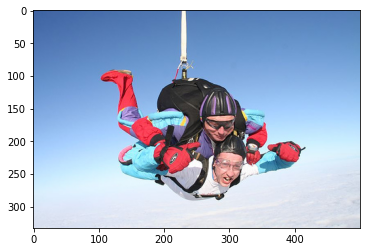

In [49]:
img = Image.open("imagenette2/train/n03888257/n03888257_9609.JPEG").convert('RGB')
plt.imshow(img)

In [50]:
tensor = transform(img).unsqueeze(0) # transform and add batch dimension
tensor.shape

torch.Size([1, 3, 224, 224])

In [51]:
with torch.no_grad():
    out = model(tensor)
probabilities = torch.nn.functional.softmax(out[0], dim=0)

In [52]:
# Print top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

parachute 0.9317987561225891
flagpole 0.0004902076325379312
candle 0.0002468009479343891
ski 0.0002403219259576872
llama 0.00021324324188753963
